## Prévision d'étiquettes sur StackOverflow avec régression logistique

Dans cet exercice, vous apprendrez à prévoir les étiquettes attribuées aux publications de StackOverflow. Les étiquettes peuvent être multiples, alors, la classification doit être multi-étiquette.

## Pré-traitement de texte

Pour les tâches suivantes, vous devrez utiliser une liste de stop words. Elle peut être téléchargé à partir de *nltk*:

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dans cette tâche, vous allez traiter un ensemble de données de titres d'articles de StackOverflow. Vous êtes fourni avec les données divisées en 3 ensembles : *train*, *validation* et *test*. Tous les corpus (à l'exception de *test*) contiennent les titres des publications et les étiquettes correspondantes (100 étiquettes sont disponibles). Téléchargez les corpus en utilisant *pandas* et regardez les données :

In [2]:
from ast import literal_eval
import pandas as pd
import numpy as np

In [3]:
def read_data(filename):
    data = pd.read_csv(filename, sep='\t')
    data['tags'] = data['tags'].apply(literal_eval)
    return data

In [4]:
train = read_data('data/train.tsv')
validation = read_data('data/validation.tsv')
test = pd.read_csv('data/test.tsv', sep='\t')

In [5]:
train.head()

,title,tags
0,How to draw a stacked dotplot in R?,[r]
1,mysql select all records where a datetime fiel...,"[php, mysql]"
2,How to terminate windows phone 8.1 app,[c#]
3,get current time in a specific country via jquery,"[javascript, jquery]"
4,Configuring Tomcat to Use SSL,[java]


Comme vous pouvez le constater, la colonne *titre* contient les titres des publications et la colonne *tags* contient les étiquettes. On pourrait remarquer qu'un certain nombre de étiquettes pour une publication n'est pas fixe et peut être autant que nécessaire.

Pour convenance, initialise *X_train*, *X_val*, *X_test*, *y_train*, *y_val*.

In [6]:
X_train, y_train = train['title'].values, train['tags'].values
X_val, y_val = validation['title'].values, validation['tags'].values
X_test = test['title'].values

L'une des difficultés lorsque l'on travaille avec des données crues est que celles-ci sont non structurées. Si vous utilisez les textes sans modification préparative et extrayez les tokens (jetons) simplement en divisant les titres par des espaces, vous verrez qu'il existe de nombreux tokens "étranges" ou inutiles comme *3.5?*. Il est donc généralement utile de préparer les données d’une manière ou d’une autre. Dans cette tâche, vous écrivez une fonction pour préparer les données de texte pour les traitements ultérieurs.

**Tâche 1 (TextPrepare).** Implémentez la fonction *text_prepare* en suivant les instructions. Après cela, exécutez la fonction *test_text_prepare* pour le tester sur quelques exemples.

In [7]:
import re

In [8]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower()
    text = re.sub(REPLACE_BY_SPACE_RE, ' ', text)
    text = re.sub(BAD_SYMBOLS_RE, '', text)
    text = ' '.join([w for w in text.split() if w not in STOPWORDS])
    return text

In [9]:
def test_text_prepare():
    examples = ["SQL Server - any equivalent of Excel's CHOOSE function?",
                "How to free c++ memory vector<int> * arr?"
                "Pausing a method for set # of milliseconds"]
    answers = ["sql server equivalent excels choose function", 
               "free c++ memory vectorint arr"
               "pausing method set # milliseconds"]
    for ex, ans in zip(examples, answers):
        print(text_prepare(ex))
        if text_prepare(ex) != ans:
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [10]:
print(test_text_prepare())

sql server equivalent excels choose function
free c++ memory vectorint arrpausing method set # milliseconds
Basic tests are passed.


Exécuter votre implémentation pour les questions du fichier *text_prepare_tests.tsv*.

In [11]:
prepared_questions = []
for line in open('data/text_prepare_tests.tsv', encoding='utf-8'):
    line = text_prepare(line.strip())
    prepared_questions.append(line)
text_prepare_results = '\n'.join(prepared_questions)

# Examinez contenu de text_prepare_results 
# 100 éléments
print(text_prepare_results)

sqlite php readonly
creating multiple textboxes dynamically
self one prefer javascript
save php date string mysql database timestamp
fill dropdownlist data xml file aspnet application
programmatically trigger jqueryui draggables drag event
get value method argument via reflection java
knockout mapingfromjs observablearray json object data gets lost
facebook connect localhost weird stuff
fullcalendar prev next click
syntaxerror unexpected token
effective way float double comparison
gem install rails fails dns error
listshuttle component richfaces getting updated
laravel responsedownload show images laravel
wrong rspec test
calendar display using java swing
python selenium import regular firefox profile addons
random number 2 variables values
altering http responses firefox extension
start session python web application
align radio buttons horizontally django forms
count number rows sqlite database
wordpress wp_rewrite rules
removing sheet excel 2005 using php
php fatal error function na

Maintenant, nous allons prétraiter les titres en utilisant la fonction * text_prepare * et en nous assurant que les titres n'ont pas de mauvais symboles:

In [12]:
X_train = [text_prepare(x) for x in X_train]
X_val = [text_prepare(x) for x in X_val]
X_test = [text_prepare(x) for x in X_test]

In [13]:
X_train[:3]

['draw stacked dotplot r',
 'mysql select records datetime field less specified value',
 'terminate windows phone 81 app']

Pour chaque étiquette et chaque mot, calculez combien de fois qu'ils apparaissent dans le corpus *train*.

**Tâche 2 (BagofWords).** Trouvez les 3 étiquettes les plus communes et les 3 mots les plus communs dans le corpus *train*. Imprimez aussi le nombre de mots uniques dans le corpus.

In [14]:
# Dictionnaire de toutes les étiquettes du corpus *train* avec leurs comptes
tags_counts = {}
# Dictionnaire de tous mots du *train* corpus avec leurs comptes
words_counts = {}

######################################
######### VOTRE CODE ICI #############
######################################

slist = list()
for n in y_train:
    for i in n:
        slist.append(i)
        
slist.sort()
llen = len(slist)
ccount = 0
while ccount < llen :
    count = slist.count(slist[ccount])
    tags_counts[slist[ccount]] = count
    ccount += count

tlist = list()
for n in X_train:
    for i in n.split():
        tlist.append(i)

tlist.sort()
llen = len(tlist)
ccount = 0
wc = 0

while ccount < llen :
    count = tlist.count(tlist[ccount])
    words_counts[tlist[ccount]] = count
    ccount += count
    wc += 1
    
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print(most_common_tags)
print(most_common_words)
print("Number of unique words: ")
print(wc)

[('javascript', 19078), ('c#', 19077), ('java', 18661)]
[('using', 8278), ('php', 5614), ('java', 5501)]
Number of unique words: 
31497


*tags_counts* et *words_counts* seront des dictionnaires comme `{'un_mot_ou_étiquette': fréquence}`. Après application de la procédure de tri, les résultats seront: `[('mot_ou_étiquette_le_plus_commun', fréquence), ('mot_ou_étiquette_le_moins-commun', fréquence), ...]`. Imprimez les 3 étiquettes et les 3 mots les plus communs comme montré ci-dessous:

    étiquette1,étiquette2,étiquette3
    mot1,mot2,mot3

In [15]:
most_common_tags = sorted(tags_counts.items(), key=lambda x: x[1], reverse=True)[:3]
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:3]

# Imprimez toutes les 3 étiquettes et les 3 mots les plus communs.
######################################
######### VOTRE CODE ICI #############
######################################
print('WordsTagsCount', '%s\n%s' % (','.join(tag for tag, _ in most_common_tags), 
                                                ','.join(word for word, _ in most_common_words)))

WordsTagsCount javascript,c#,java
using,php,java


### Transformer du texte aux vecteurs

Les algorithmes d'apprentissage automatique fonctionnent avec des données numériques. Il existe de nombreuses façons de transformer des données texte en vecteurs numériques. Dans cette tâche, vous allez essayer d’en utiliser deux.

#### Bag of words

L'une des approches les plus connues est la représentation en «bag of words». Pour créer cette transformation, suivez les étapes suivantes:
1. Trouvez *N* les mots les plus utilisés dans le corpus *train* et numérotez-les. Nous avons maintenant un dictionnaire des mots les plus communs.
2. Pour chaque titre dans les corpus, créez un vecteur zéro dont la dimension est égale à *1xN*.
3. Pour chaque mot dans chaque titre dans les corpus, parcourez les mots du dictionnaire et attribuez la valeur 1 à la coordonnée correspondante à l'index du mot dans le vecteur. (Vous observerez que le vecteur peut être extrêmement creuse. L'observation est significative.)

Voici un exemple. Supposons que *N* = 4 et que la liste des mots les plus communs est :  

    ['hi', 'you', 'me', 'are']

Ensuite, nous devons les numéroter, par exemple, comme ceci:

    {'hi': 0, 'you': 1, 'me': 2, 'are': 3}

Maintenant, nous transformerons chaque titre en vecteur. Par exemple:

    'hi how are you'

Pour ce titre, nous créons un vecteur zéro

    [0, 0, 0, 0]
    
Puis, nous parcourons tous les mots du titre, et si un mot est dans le dictionnaire, nous attribuons la valeur 1 à la coordonnée correspondante dans le vecteur:

    'hi':  [1, 0, 0, 0]
    'how': [1, 0, 0, 0] # mot 'how' ne se trouve pas dans le dictionnaire
    'are': [1, 0, 0, 1]
    'you': [1, 1, 0, 1]

Le vecteur résultant est

    [1, 1, 0, 1]
   
Implémentez cet algorithme dans la fonction *my_bag_of_words* avec la taille du dictionnaire égale à 5000. Pour trouver les mots les plus communs, utilisez les données de *train*. Vous pouvez tester votre code en utilisant la fonction *test_my_bag_of_words*.

In [16]:
DICT_SIZE = 5000

####### VOTRE CODE ICI #######
most_common_5000_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:5000]
WORDS_TO_INDEX = dict();
for i in range(DICT_SIZE):
    WORDS_TO_INDEX[most_common_5000_words[i][0]] = i

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)
    ######################################
    ######### VOTRE CODE ICI #############
    ######################################    

    for w in text.split():
        if w in words_to_index:
            result_vector[words_to_index[w]] = 1
    
    return result_vector

In [17]:
def test_my_bag_of_words():
    words_to_index = {'hi': 0, 'you': 1, 'me': 2, 'are': 3}
    examples = ['hi how are you']
    answers = [[1, 1, 0, 1]]
    for ex, ans in zip(examples, answers):
        if (my_bag_of_words(ex, words_to_index, 4) != ans).any():
            return "Wrong answer for the case: '%s'" % ex
    return 'Basic tests are passed.'

In [18]:
print(test_my_bag_of_words())

Basic tests are passed.


Appliquez maintenant la fonction implémentée à tous les trois corpus *train*, *validate* et *test* (le calcul exigera du temps). Nous transformons les données en vecteurs creuses afin de stocker efficacement les informations utiles. Il existe de nombreux types de telles représentations [types](https://docs.scipy.org/doc/scipy/reference/sparse.html) , mais les algorithmes sklearn ne peuvent fonctionner qu'avec la matrice csr, nous allons donc utiliser celle-ci. [csr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) 

In [19]:
from scipy import sparse as sp_sparse

In [20]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
X_val_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_val])
X_test_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_test])
print('X_train shape ', X_train_mybag.shape)
print('X_val shape ', X_val_mybag.shape)
print('X_test shape ', X_test_mybag.shape)

X_train shape  (100000, 5000)
X_val shape  (30000, 5000)
X_test shape  (20000, 5000)


**Tâche 3 (BagOfWords, Matrice Creuse).** Pour la 11ème ligne de *X_train_mybag*, imprimez le nombre d'éléments non nuls dont il dispose. Dans cette tâche, la réponse (variable *non_zero_elements_count*) doit être un nombre, par exemple, 20

In [21]:
row = X_train_mybag[10].toarray()[0]

######################################
######### VOTRE CODE ICI #############
######################################
non_zero_elements_count = 0
for i in row:
    if i != 0:
        non_zero_elements_count += 1

print('BagOfWords', str(non_zero_elements_count))

BagOfWords 7


#### TF-IDF

La deuxième approche essaye d'améliorer du bag-of-words en tenant compte de la fréquence totale des mots dans les corpus. Il pourrait être utile à pénaliser les mots trop fréquents afin de rendre l'espace de features plus percutant.

Implémentez la fonction *tfidf_features* en utilisant la classe TfidfVectorizer de scikit-learn. [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) Utilisez le corpus *train* pour pour l'entrainement du vectoriseur. N'oubliez pas d'examiner les arguments que vous pouvez lui transmettre. Nous vous suggérons de filtrer les mots trop rares (moins de 5 titres) et trop fréquents (plus de 90% des titres). En outre, utilisez des bigrammes avec des unigrammes dans votre vocabulaire.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
def tfidf_features(X_train, X_val, X_test):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Créer un vectoriseur TF-IDF avec un choix de paramètres approprié
    # Fit le vectoriseur sur le corpus train.
    # Transformez les train, test, and validation données et donnez les résultats 
    #    (attention de ne pas fit le corpus train deux fois)
    
    ######################################
    ######### VOTRE CODE ICI #############
    ######################################    
    tfidf_vectorizer=TfidfVectorizer(token_pattern='(\S+)',ngram_range=(1,2), max_df=0.9, min_df=5, use_idf=True)
    
    vecs_X_train=tfidf_vectorizer.fit_transform(X_train)
    
    vecs_X_val=tfidf_vectorizer.transform(X_val)
    vecs_X_test=tfidf_vectorizer.transform(X_test)    
    
    return vecs_X_train, vecs_X_val, vecs_X_test, tfidf_vectorizer.vocabulary_

Une fois le pré-traitement du texte terminé, examinez toujours les résultats. Soyez très prudent à cette étape, car les performances des futurs modèles en dépendront énormément.

Vérifiez si vous avez c ++ ou c # dans votre vocabulaire, car il s’agit bien d'étiquettes importants dans notre tâche de prédiction :

In [24]:
X_train_tfidf, X_val_tfidf, X_test_tfidf, tfidf_vocab = tfidf_features(X_train, X_val, X_test)
print (X_train_tfidf.shape)
print (X_val_tfidf.shape)
print (X_test_tfidf.shape)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

(100000, 18300)
(30000, 18300)
(20000, 18300)


In [25]:
######### VOTRE CODE ICI #############
print(tfidf_vocab["c#"])
print(tfidf_vocab["c++"])

1879
1976


Si vous ne pouvez pas les trouver, nous devons comprendre comment il s'est produit de les perdre. Cela s'est produit lors de la génération de étiquettes intégrée de TfidfVectorizer. Heureusement, nous pouvons influencer ce processus. Revenez à la fonction ci-dessus et utilisez le RegEx '(\S+)' en tant que *token_pattern* dans le constructeur du vectoriseur.

Maintenant, utilisez cette transformation pour les données et vérifiez à nouveau.

In [26]:
######### VOTRE CODE ICI #############
print(tfidf_vocab["c#"])
print(tfidf_vocab["c++"])

1879
1976


### Classificateur MultiLabel

Chaque titre peut comporter plusieurs étiquettes. Pour traiter ce type de prédiction, nous devons transformer les étiquettes en une forme binaire et la prédiction sera un masque de 0 et de 1. À cette fin, il est commode d'utiliser [MultiLabelBinarizer] (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) de *sklearn*.

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

In [28]:
# from sklearn.preprocessing import MultiLabelBinarizer
y_train = train['tags'].values
y_val = validation['tags'].values
mlb = MultiLabelBinarizer(classes=sorted(tags_counts.keys()))
y_train = mlb.fit_transform(y_train)
y_val = mlb.fit_transform(y_val)

Implémentez la fonction *train_classifier* pour effectuer l'entraînement d'un classificateur. Dans cette tâche, utilisez l'approche One-vs-Rest, implémentée dans la classe OneVsRestClassifier [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html). Dans cette approche, *k* classificateurs (k = nombre d'étiquettes) sont entraînés. Vous devez choisir un classificateur de base qui sera executé par OneVsRestClassifier. LogisticRegression [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) est l'une des méthodes les plus simples, mais elle est souvent assez performante pour les tâches de la classification de texte. Cela peut prendre un certain temps, car le nombre de classificateurs est important.

In [29]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
def train_classifier(X_train, y_train):
    """
      X_train, y_train — training data
      
      return: trained classifier
    """
    
    # Créez et fit la régression logistique intégrée à OneVsRestClassifier.
    
    ######################################
    ######### Votre code ici #############
    ######################################   
    classifier = OneVsRestClassifier(LogisticRegression())
    classifier.fit(X_train,y_train)
    return classifier   

Entraînez les classificateurs pour les deux différentes transformations de données: *bag-of-words* et *tf-idf*.

In [31]:
classifier_mybag = train_classifier(X_train_mybag, y_train)
classifier_tfidf = train_classifier(X_train_tfidf, y_train)

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Vous pouvez maintenant créer des prévisions pour les données. Vous aurez deux types de données sortantes : les étiquettes prédites et les scores donnant le taux de confiance dans la prévision. Les classifications sont éffectués sur le corpus *validation* afin de nous permettre de comparer les prévisions avec les classifications réels.

In [32]:
y_val_predicted_labels_mybag = classifier_mybag.predict(X_val_mybag)
y_val_predicted_scores_mybag = classifier_mybag.decision_function(X_val_mybag)

y_val_predicted_labels_tfidf = classifier_tfidf.predict(X_val_tfidf)
y_val_predicted_scores_tfidf = classifier_tfidf.decision_function(X_val_tfidf)

Voyons maintenant comment le classificateur TF-IDF fonctionne pour quelques exemples:

In [33]:
y_val_pred_inversed = mlb.inverse_transform(y_val_predicted_labels_tfidf)
y_val_inversed = mlb.inverse_transform(y_val)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(y_val_pred_inversed[i])
    ))

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	json,ruby-on-rails




Nous allons comparer les résultats de différentes prédictions pour voir si la transformation TF-IDF améliore les résultats en comparaison avec le bag-of-words simple ou pour essayer différentes techniques de régularisation dans la régression logistique. Pour toutes ces expériences, nous devons configurer une procédure d'évaluation.

### Evaluation

Pour évaluer les résultats, nous utiliserons plusieurs mesures de classification:
 - [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
 - [F1-score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
 - [Area under ROC-curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)
 - [Area under precision-recall curve](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score) 

Essayez les mesures F1-score et average-précision avec les options de l'établissement de moyenne (averaging) *micro*, *macro*, et *weighted*.

*micro* : Calculez les mesures globalement en comptant le total des vrais positifs, des faux négatifs et des faux positifs.

*macro* : Calculez les métriques pour chaque étiquette et trouvez leur moyenne non pondérée. Cela ne prend pas en compte le déséquilibre en nombre des étiquettes.

*weighted* : Calculez les métriques pour chaque étiquette et trouvez leur moyenne pondérée par support (le nombre d'instances vraies pour chaque étiquette). Cela modifie la «macro» pour tenir compte du déséquilibre des étiquettes; il peut en résulter un score F qui ne se situe pas entre precison et recall.

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

Implémentez la fonction *print_evaluation_scores* qui effectue le calcule et l'affiche sur stdout:

 - *accuracy*
 - *F1-score macro/micro/weighted*
 - *Precision macro/micro/weighted*

In [35]:
def print_evaluation_scores(y_val, predicted):
    
    ######################################
    ######### VOTRE CODE ICI #############
    ######################################  
    acscore = accuracy_score(y_val, predicted)
    print("Accuracy %s" % acscore)
    fscore_micro = f1_score(y_val, predicted, average='micro')
    fscore_macro = f1_score(y_val, predicted, average='macro')
    fscore_weighted = f1_score(y_val, predicted, average='weighted')
    print("F1 Micro %s" % fscore_micro)
    print("F1 Macro %s" % fscore_macro)
    print("F1 Weighted %s" % fscore_weighted)
    ap_micro = average_precision_score(y_val, predicted, average='micro')
    ap_macro = average_precision_score(y_val, predicted, average='macro')
    ap_weighted = average_precision_score(y_val, predicted, average='weighted')
    print("Average Precision Micro (global) %s" % ap_micro)
    print("Average Precision Macro (per label) %s" % ap_macro)
    print("Average Precision Micro (label imbalance weighted) %s" % ap_weighted)

In [36]:
print('Bag-of-words')
print_evaluation_scores(y_val, y_val_predicted_labels_mybag)
print('Tfidf')
print_evaluation_scores(y_val, y_val_predicted_labels_tfidf)

Bag-of-words
Accuracy 0.3611
F1 Micro 0.6736346085981773
F1 Macro 0.5073129444125168
F1 Weighted 0.6513385859578331
Average Precision Micro (global) 0.48437286361490056
Average Precision Macro (per label) 0.3480564428906894
Average Precision Micro (label imbalance weighted) 0.513738430617779
Tfidf
Accuracy 0.33393333333333336
F1 Micro 0.6418233967551946
F1 Macro 0.44570945215918634
F1 Weighted 0.6143634328155098
Average Precision Micro (global) 0.4570020540292232
Average Precision Macro (per label) 0.3020320489939477
Average Precision Micro (label imbalance weighted) 0.4851114604464971


Tracez une généralisation de la [ROC curve] (http://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc) pour le cas d'une classification multi-étiquettes avec la fonction fournie *roc_auc*. Les paramètres d'entrée de cette fonction sont:
 - true labels (étiquettes vraies)
 - decision functions scores (scores de la fonction de décision)
 - number of classes (nombre de volets)

In [37]:
from metrics import roc_auc
%matplotlib inline

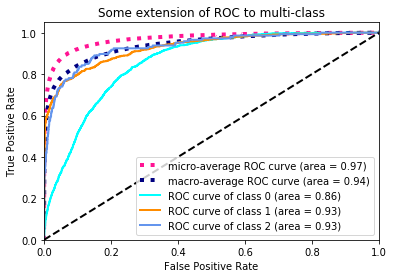

In [38]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_mybag, n_classes)

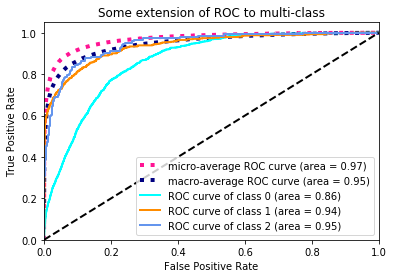

In [39]:
n_classes = len(tags_counts)
roc_auc(y_val, y_val_predicted_scores_tfidf, n_classes)

**Tâche 4 (MultilabelClassification).** 
Faites les expériences avec l'entraînement de vos classificateurs. Utiliser *F1-score weighted* comme métrique d'évaluation. 
- comparez la qualité des approches du bag-of-words et de la TF-IDF et choisissez l'une d'entre elles.
- pour celui que vous avez choisi, essayez *L1* et *L2* régularisation en la régression logistique avec des coefficients différents (par exemple, C égal à 0,1, 1, 10, 100).

Vous pouvez également essayer d'autres améliorations du pré-traitement / modèle, si vous le souhaitez.

In [40]:
######################################
######### VOTRE CODE ICI #############
######################################
def train_newclassifier(X_train, y_train):
    """
      X_train, y_train — training data    
      return: trained classifier
    """   
    # Create and fit LogisticRegression wraped into OneVsRestClassifier.

    #test 1 classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', solver='liblinear', C=0.8, max_iter=120))
    #test 2 classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', solver='liblinear', C=0.5, max_iter=200))
    #test 3 classifier = OneVsRestClassifier(LogisticRegression(penalty='l2', solver='liblinear', C=0.8, max_iter=120))
    classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=50))
    classifier.fit(X_train,y_train)
    return classifier 

In [41]:
######################################
######### VOTRE CODE ICI #############
######################################
newclassifier_mybag = train_newclassifier(X_train_mybag, y_train)
new_y_val_predicted_labels_mybag = newclassifier_mybag.predict(X_val_mybag)
new_y_val_predicted_scores_mybag = newclassifier_mybag.decision_function(X_val_mybag)
new_y_val_pred_inversed = mlb.inverse_transform(new_y_val_predicted_labels_mybag)
for i in range(3):
    print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_val[i],
        ','.join(y_val_inversed[i]),
        ','.join(new_y_val_pred_inversed[i])
    ))
print_evaluation_scores(y_val, new_y_val_predicted_labels_mybag)    

Title:	odbc_exec always fail
True labels:	php,sql
Predicted labels:	


Title:	access base classes variable within child class
True labels:	javascript
Predicted labels:	class


Title:	contenttype application json required rails
True labels:	ruby,ruby-on-rails
Predicted labels:	ruby-on-rails


Accuracy 0.36793333333333333
F1 Micro 0.6801908326307348
F1 Macro 0.518868086882597
F1 Weighted 0.6581670371277996
Average Precision Micro (global) 0.4910615761033032
Average Precision Macro (per label) 0.35778704267094524
Average Precision Micro (label imbalance weighted) 0.5204549756490517


Lorsque vous êtes satisfait de la qualité, créez des prévisions pour corpus *test*. Imprimez les résultats (20000 éléments).

In [42]:
######################################
######### VOTRE CODE ICI #############
######################################
test_predictions = newclassifier_mybag.predict(X_test_mybag)
test_pred_inversed = mlb.inverse_transform(test_predictions)

test_predictions_for_review = '\n'.join('%i\t%s' % (i, ','.join(row)) for i, row in enumerate(test_pred_inversed))
print('MultilabelClassification', test_predictions_for_review)

MultilabelClassification 0	mysql,php
1	javascript
2	
3	javascript,jquery
4	android,java
5	php,xml
6	json,web-services
7	java,swing
8	python
9	html
10	jquery
11	
12	php
13	ruby-on-rails
14	c#,linq
15	python
16	
17	ajax,html,javascript,jquery,ruby-on-rails
18	
19	linux,sockets
20	python
21	pandas,python
22	c++
23	
24	php,wordpress
25	c++
26	ruby,ruby-on-rails
27	c#,wpf
28	python
29	r
30	javascript,jquery
31	c#
32	javascript
33	python
34	hibernate,java,spring
35	
36	c#,wpf,xaml
37	javascript
38	php
39	java
40	java,sockets
41	c#
42	
43	eclipse,java
44	c#
45	php
46	c#
47	
48	
49	c++,eclipse
50	javascript,jquery
51	c#
52	c++
53	javascript
54	javascript
55	
56	python
57	c#
58	ios,objective-c
59	dom,html,javascript
60	java
61	javascript,validation
62	
63	c#
64	django
65	python
66	string
67	python
68	
69	javascript
70	javascript,jquery
71	c++
72	python
73	
74	python
75	ajax,php
76	
77	
78	
79	php
80	html,javascript
81	objective-c
82	ajax,javascript,jquery
83	numpy,python
84	asp.net,c#
85	python

### Analyse des features les plus importants

Examinez les features (mots ou n-grammes) utilisées avec les poids les plus importants dans votre modèle de régression logistique.

Implémentez la fonction *print_words_for_tag* pour trouver les 5 features (mots) avec les poids les plus importants et les poids les moins importants pour les étiquettes *c*, *c++* et *linux*. (Vous pouvez ajoutes des autres.) Revenez à la documentation de Sklearn sur [OneVsRestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) et [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) si vous en avez besoin.

In [43]:
def print_words_for_tag(classifier, tag, tags_classes, index_to_words):
    """
        classifier: trained classifier
        tag: particular tag
        tags_classes: a list of classes names from MultiLabelBinarizer
        index_to_words: index_to_words transformation
        
        return nothing, just print top 5 positive and top 5 negative words for current tag
    """
    print('Tag:\t{}'.format(tag))
    
    # Extraire un estimateur du classificateur pour l'étiquette donnée.
    # Extraire les coefficients des features de l'estimateur.
    ######################################
    ######### VOTRE CODE ICI #############
    ######################################
    
    coef_for_tag = classifier.coef_[tags_classes.index(tag)]  
    sorted_ind = sorted(range(len(coef_for_tag)), key = lambda x: coef_for_tag[x])
    
    top_positive_words = [index_to_words[ind] for ind in sorted_ind[-5:]]
    top_negative_words = [index_to_words[ind] for ind in sorted_ind[:5]]   
    print('Top positive words:\t{}'.format(', '.join(top_positive_words)))
    print('Top negative words:\t{}\n'.format(', '.join(top_negative_words)))

In [44]:
print_words_for_tag(classifier_tfidf, 'c', mlb.classes, tfidf_reversed_vocab)
print_words_for_tag(classifier_tfidf, 'c++', mlb.classes, tfidf_reversed_vocab)
print_words_for_tag(classifier_tfidf, 'linux', mlb.classes, tfidf_reversed_vocab)

Tag:	c
Top positive words:	gcc, printf, scanf, malloc, c
Top negative words:	java, php, python, javascript, c#

Tag:	c++
Top positive words:	opencv, mfc, boost, qt, c++
Top negative words:	java, php, python, javascript, c#

Tag:	linux
Top positive words:	signal, address, c, ubuntu, linux
Top negative words:	javascript, c#, jquery, array, method

